### Appendix

# DAT405 Introduction to Data Science and AI 
## 2022-2023, Reading Period 2
## Assignment 4: Spam classification using Naïve Bayes 
There will be an overall grade for this assignment. To get a pass grade (grade 5), you need to pass items 1-3 below. To receive higher grades, finish items 4 and 5 as well. 

The exercise takes place in a notebook environment where you can chose to use Jupyter or Google Colabs. We recommend you use Google Colabs as it will facilitate remote group-work and makes the assignment less technical. 
Hints:
You can execute certain linux shell commands by prefixing the command with `!`. You can insert Markdown cells and code cells. The first you can use for documenting and explaining your results the second you can use writing code snippets that execute the tasks required.  

In this assignment you will implement a Naïve Bayes classifier in Python that will classify emails into spam and non-spam (“ham”) classes.  Your program should be able to train on a given set of spam and “ham” datasets. 
You will work with the datasets available at https://spamassassin.apache.org/old/publiccorpus/. There are three types of files in this location: 
-	easy-ham: non-spam messages typically quite easy to differentiate from spam messages. 
-	hard-ham: non-spam messages more difficult to differentiate 
-	spam: spam messages 

**Execute the cell below to download and extract the data into the environment of the notebook -- it will take a few seconds.** If you chose to use Jupyter notebooks you will have to run the commands in the cell below on your local computer, with Windows you can use 
7zip (https://www.7-zip.org/download.html) to decompress the data.



In [57]:
#Download and extract data
#!wget https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
#!wget https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
#!wget https://spamassassin.apache.org/old/publiccorpus/20021010_spam.tar.bz2
#!tar -xjf 20021010_easy_ham.tar.bz2
#!tar -xjf 20021010_hard_ham.tar.bz2
#!tar -xjf 20021010_spam.tar.bz2

*The* data is now in the three folders `easy_ham`, `hard_ham`, and `spam`.

In [58]:
#!ls -lah

In [59]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

###1. Preprocessing: 
1.	Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text. Further down (in the higher-grade part), you will be asked to filter out the headers and footers. 
2.	We don’t want to train and test on the same data. Split the spam and the ham datasets in a training set and a test set. (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`)


In [60]:
# Functions that write the mail content and type to data frame
def readFileContent(path, type):
    rows=[]
    for file_name in os.listdir(path):
        file = os.path.join(path, file_name)
        if os.path.isfile(file):
            with open(file, encoding='latin-1' ) as file: 
                rows.append({'message': file.read(), 'type': type})
    return pd.DataFrame(rows)

# read mail and its classification in to data frame(classification Ham=0 & Spam =1)
email_easy_ham_df = readFileContent('./20021010_easy_ham/easy_ham/', 0)
email_hard_ham_df = readFileContent('./20021010_hard_ham/hard_ham/', 0)
email_spam_df = readFileContent('./20021010_spam/spam/', 1)

#Splitting data in to test and train sets
easy_hamtrain,easy_hamtest=train_test_split(email_easy_ham_df, test_size =0.3 , random_state =4)
hard_hamtrain,hard_hamtest=train_test_split(email_hard_ham_df, test_size =0.3 , random_state =4)
hamtrain=pd.concat([easy_hamtrain,hard_hamtrain])
hamtest= pd.concat([easy_hamtest,hard_hamtest])

spamtrain, spamtest= train_test_split(email_spam_df, test_size =0.3 , random_state =4)


###2. Write a Python program that: 
1.	Uses four datasets (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`) 
2.	Trains a Naïve Bayes classifier (e.g. Sklearn) on `hamtrain` and `spamtrain`, that classifies the test sets and reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets. You can use `CountVectorizer` to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifier in SKlearn ([Documentation here](https://scikit-learn.org/stable/modules/naive_bayes.html)). Test two of these classifiers that are well suited for this problem
- Multinomial Naive Bayes  
- Bernoulli Naive Bayes. 

Please inspect the documentation to ensure input to the classifiers is appropriate. Discuss the differences between these two classifiers. 





In [61]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

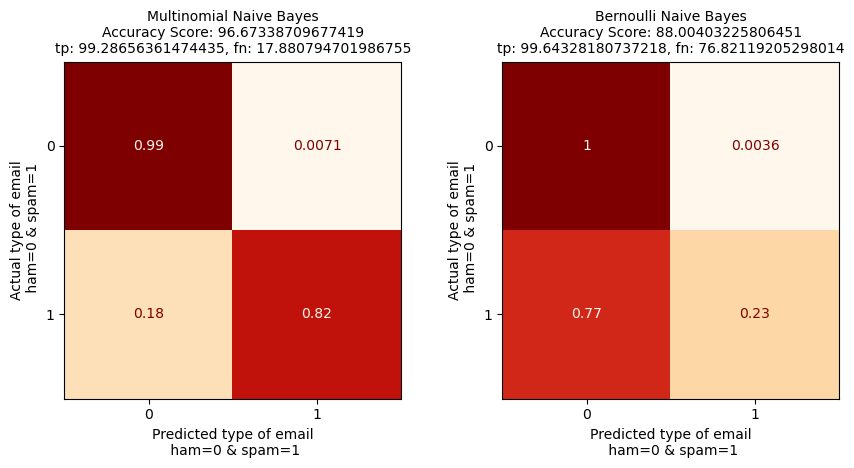

Multinomial naive Bayes classifier, Accuracy score: 96.67338709677419
Multinomial naive Bayes True Positive rate: 99.28656361474435
Multinomial naive Bayes False Negative rate: 17.880794701986755
Multinomial naive Bayes tp_mnb, fp_mnb, fn_mnb, tn_mnb 835 6 27 124
Bernoulli naive Bayes classifier, Accuracy score: 88.00403225806451
Bernoulli naive Bayes True Positive rate: 99.64328180737218
Bernoulli naive Bayes False Negative rate: 76.82119205298014
Bernoulli naive Bayes tp_bnb, fp_bnb, fn_bnb, tn_bnb 838 3 116 35


In [62]:
def naive_bayes(x_train, x_test, y_train, y_test, vectorizer=None):
    #create a Count Vectorizer and fit it to the training set of data.
    if vectorizer==None:
        vectorizer = CountVectorizer()
    vectorizer.fit(x_train)
    x_train_vec = vectorizer.transform(x_train)
    x_test_vec = vectorizer.transform(x_test)
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(10,10))
    
    #Train the Multinomial Naive Bayes model with train sets
    mnb = MultinomialNB().fit(x_train_vec, y_train)
    #Predict the values with test sets
    mnb_predict = mnb.predict(x_test_vec)
    tp_mnb, fp_mnb, fn_mnb, tn_mnb = confusion_matrix(y_test,mnb_predict).ravel()
    plot_confusion_matrix(mnb, x_test_vec, y_test, ax=ax1, colorbar=False, normalize='true', cmap = 'OrRd')
   
    #Train the Bernoulli Naive Bayes model with train sets
    bnb = BernoulliNB().fit(x_train_vec, y_train)
    #Predict the values with test sets
    bnb_predict = bnb.predict(x_test_vec)
    tp_bnb, fp_bnb, fn_bnb, tn_bnb  = confusion_matrix(y_test,bnb_predict).ravel()
    plot_confusion_matrix(bnb, x_test_vec, y_test, ax=ax2, colorbar=False, normalize='true',cmap = 'OrRd')
    
    
    # Declaring labels and title for each subplot
    ax1.set_xlabel('Predicted type of email\n ham=0 & spam=1')
    ax1.set_ylabel('Actual type of email\n ham=0 & spam=1')
    ax1.set_title('Multinomial Naive Bayes\n'+'Accuracy Score: '+str(metrics.accuracy_score(y_test, mnb_predict)*100)+'\n'+'tp: '+str((tp_mnb/(tp_mnb+fp_mnb))*100)+ ', fn: '+ str((fn_mnb/(tn_mnb+fn_mnb))*100), size=10)
    ax2.set_xlabel('Predicted type of email\n ham=0 & spam=1')
    ax2.set_ylabel('Actual type of email\n ham=0 & spam=1')
    ax2.set_title('Bernoulli Naive Bayes\n'+'Accuracy Score: '+str(metrics.accuracy_score(y_test, bnb_predict)*100)+'\n'+'tp: '+str((tp_bnb/(tp_bnb+fp_bnb))*100)+ ', fn: '+ str((fn_bnb/(tn_bnb+fn_bnb))*100), size=10)
    plt.subplots_adjust(wspace=0.3)
    plt.show()
    
    print("Multinomial naive Bayes classifier, Accuracy score:", metrics.accuracy_score(y_test, mnb_predict)*100)
    print("Multinomial naive Bayes True Positive rate:", str((tp_mnb/(tp_mnb+fp_mnb))*100))
    print("Multinomial naive Bayes False Negative rate:", str((fn_mnb/(tn_mnb+fn_mnb))*100))
    print("Multinomial naive Bayes tp_mnb, fp_mnb, fn_mnb, tn_mnb",tp_mnb, fp_mnb, fn_mnb, tn_mnb)

    print("Bernoulli naive Bayes classifier, Accuracy score:", metrics.accuracy_score(y_test, bnb_predict)*100)
    print("Bernoulli naive Bayes True Positive rate:", str((tp_bnb/(tp_bnb+fp_bnb))*100))
    print("Bernoulli naive Bayes False Negative rate:", str((fn_bnb/(tn_bnb+fn_bnb))*100))
    print("Bernoulli naive Bayes tp_bnb, fp_bnb, fn_bnb, tn_bnb",tp_bnb, fp_bnb, fn_bnb, tn_bnb)
    
#Concatinating hamtrain & spamtrain
train_df=pd.concat([hamtrain,spamtrain])
#Concatinating hamtest & spamtest
test_df=pd.concat([hamtest,spamtest])
#Assigning data to the variables that will be used to develop the model
x_train = train_df['message']
y_train = train_df['type']
x_test = test_df['message']
y_test = test_df['type']
naive_bayes(x_train, x_test, y_train, y_test)

Your discussion here

### 3.Run your program on 
-	Spam versus easy-ham 
-	Spam versus hard-ham.

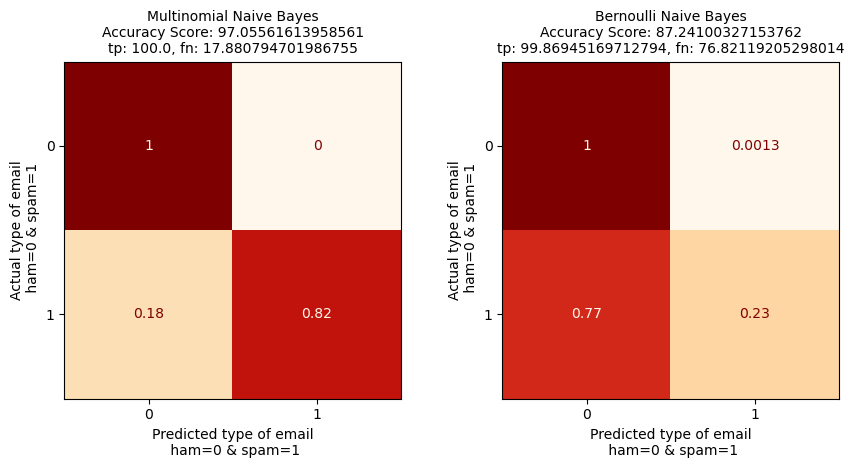

Multinomial naive Bayes classifier, Accuracy score: 97.05561613958561
Multinomial naive Bayes True Positive rate: 100.0
Multinomial naive Bayes False Negative rate: 17.880794701986755
Multinomial naive Bayes tp_mnb, fp_mnb, fn_mnb, tn_mnb 766 0 27 124
Bernoulli naive Bayes classifier, Accuracy score: 87.24100327153762
Bernoulli naive Bayes True Positive rate: 99.86945169712794
Bernoulli naive Bayes False Negative rate: 76.82119205298014
Bernoulli naive Bayes tp_bnb, fp_bnb, fn_bnb, tn_bnb 765 1 116 35


In [63]:
# Spam versus easy-ham trained with full data and test only with easy ham and spam data
def easyHam_spam_total_train(vectorizer=None):
    test_easyHam_spam_df=pd.concat([easy_hamtest,spamtest])
    x_train = train_df['message']
    y_train = train_df['type']
    x_easyHam_spam_test = test_easyHam_spam_df['message']
    y_easyHam_spam_test = test_easyHam_spam_df['type']
    naive_bayes(x_train, x_easyHam_spam_test, y_train, y_easyHam_spam_test,vectorizer=vectorizer)
easyHam_spam_total_train()

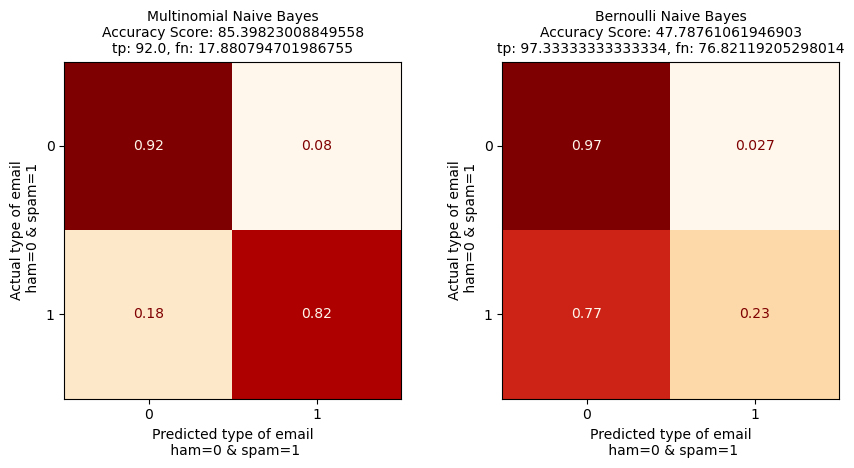

Multinomial naive Bayes classifier, Accuracy score: 85.39823008849558
Multinomial naive Bayes True Positive rate: 92.0
Multinomial naive Bayes False Negative rate: 17.880794701986755
Multinomial naive Bayes tp_mnb, fp_mnb, fn_mnb, tn_mnb 69 6 27 124
Bernoulli naive Bayes classifier, Accuracy score: 47.78761061946903
Bernoulli naive Bayes True Positive rate: 97.33333333333334
Bernoulli naive Bayes False Negative rate: 76.82119205298014
Bernoulli naive Bayes tp_bnb, fp_bnb, fn_bnb, tn_bnb 73 2 116 35


In [64]:
# Spam versus hard-ham trained with full data and tested only with Hard ham and spam data
def hardHam_spam_total_train(vectorizer=None):
    test_hardHam_spam_df=pd.concat([hard_hamtest,spamtest])
    x_train = train_df['message']
    y_train = train_df['type']
    x_hardHam_spam_test = test_hardHam_spam_df['message']
    y_hardHam_spam_test = test_hardHam_spam_df['type']
    naive_bayes(x_train, x_hardHam_spam_test, y_train, y_hardHam_spam_test,vectorizer=vectorizer)
hardHam_spam_total_train()

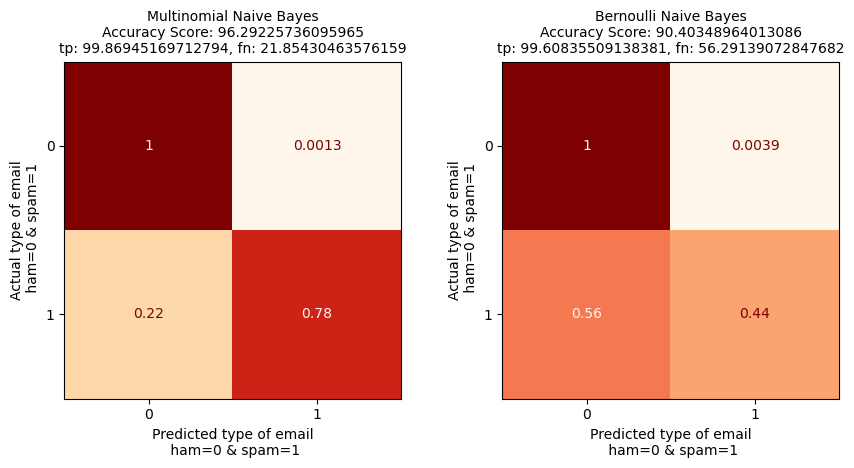

Multinomial naive Bayes classifier, Accuracy score: 96.29225736095965
Multinomial naive Bayes True Positive rate: 99.86945169712794
Multinomial naive Bayes False Negative rate: 21.85430463576159
Multinomial naive Bayes tp_mnb, fp_mnb, fn_mnb, tn_mnb 765 1 33 118
Bernoulli naive Bayes classifier, Accuracy score: 90.40348964013086
Bernoulli naive Bayes True Positive rate: 99.60835509138381
Bernoulli naive Bayes False Negative rate: 56.29139072847682
Bernoulli naive Bayes tp_bnb, fp_bnb, fn_bnb, tn_bnb 763 3 85 66


In [65]:
# Spam versus easy-ham trained and tested with easy ham and spam data
def easyHam_spam_train(vectorizer=None):
    train_easyHam_spam_df=pd.concat([easy_hamtrain,spamtrain])
    test_easyHam_spam_df=pd.concat([easy_hamtest,spamtest])
    x_easyHam_spam_train = train_easyHam_spam_df['message']
    y_easyHam_spam_train = train_easyHam_spam_df['type']
    x_easyHam_spam_test = test_easyHam_spam_df['message']
    y_easyHam_spam_test = test_easyHam_spam_df['type']
    naive_bayes(x_easyHam_spam_train, x_easyHam_spam_test, y_easyHam_spam_train, y_easyHam_spam_test,vectorizer=vectorizer)
easyHam_spam_train()

(525,) (525,) (226,) (226,)


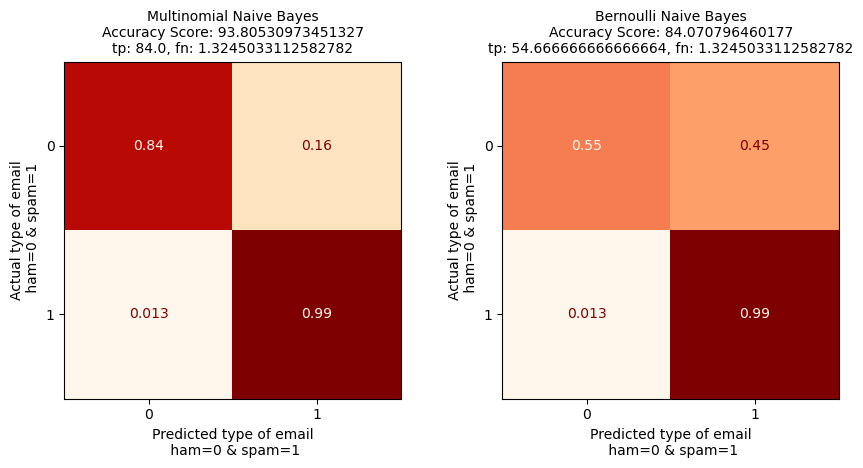

Multinomial naive Bayes classifier, Accuracy score: 93.80530973451327
Multinomial naive Bayes True Positive rate: 84.0
Multinomial naive Bayes False Negative rate: 1.3245033112582782
Multinomial naive Bayes tp_mnb, fp_mnb, fn_mnb, tn_mnb 63 12 2 149
Bernoulli naive Bayes classifier, Accuracy score: 84.070796460177
Bernoulli naive Bayes True Positive rate: 54.666666666666664
Bernoulli naive Bayes False Negative rate: 1.3245033112582782
Bernoulli naive Bayes tp_bnb, fp_bnb, fn_bnb, tn_bnb 41 34 2 149


In [66]:
# Spam versus hard-ham trained and tested with Hard ham and spam data
def hardHam_spam_train(vectorizer=None):
    train_hardHam_spam_df=pd.concat([hard_hamtrain,spamtrain])
    test_hardHam_spam_df=pd.concat([hard_hamtest,spamtest])
    x_hardHam_spam_train = train_hardHam_spam_df['message']
    y_hardHam_spam_train = train_hardHam_spam_df['type']
    x_hardHam_spam_test = test_hardHam_spam_df['message']
    y_hardHam_spam_test = test_hardHam_spam_df['type']
    print(x_hardHam_spam_train.shape,y_hardHam_spam_train.shape,x_hardHam_spam_test.shape,y_hardHam_spam_test.shape)
    naive_bayes(x_hardHam_spam_train, x_hardHam_spam_test, y_hardHam_spam_train, y_hardHam_spam_test,vectorizer=vectorizer)
hardHam_spam_train()

For Spam versus easy-ham and Spam versus hard-ham using respective trained data:

By observing above confusion matrices, accuracy score of Spam versus easy-ham, is more when compared to the, Spam versus hard-ham, in both the classifications. As it is difficult to classify type(Ham or Spam) between Spam versus hard-ham. But mutlinomial perfromed better than bernoulli in both the Spam versus easy-ham and Spam versus hard-ham data. Which is same as when model trained with, complete trained data. But when we compared these accuracy with the accuracy obtained, when model trained with complete trained data. The accuracy obtained when model trained with only resective data is higher in all the cases. Which means the model trained on the extra data leads to decrease in performance classification.

###4.	To avoid classification based on common and uninformative words it is common to filter these out. 

**a.** Argue why this may be useful. Try finding the words that are too common/uncommon in the dataset. 

**b.** Use the parameters in Sklearn’s `CountVectorizer` to filter out these words. Update the program from point 3 and run it on your data and report your results.

You have two options to do this in Sklearn: either using the words found in part (a) or letting Sklearn do it for you. Argue for your decision-making.


In [67]:
#code to Find common/uncommon words in data set
ham_df = pd.concat([email_easy_ham_df, email_hard_ham_df,email_spam_df])
countHam = Counter(" ".join(ham_df["message"]).split()).most_common()
dataHam = pd.DataFrame.from_dict(countHam)
dataHam_words=dataHam[0]
print("Most Common Words ",dataHam_words.head(30).to_numpy())
print("Least Common Words ",dataHam_words.tail(30).to_numpy())

Most Common Words  ['the' '2002' 'to' '>' 'for' 'with' 'from' 'by' 'of' 'and' 'Received:' 'a'
 'id' 'Sep' 'in' 'is' 'ESMTP' '+0100' 'that' 'I' '<td' 'you' 'Aug'
 'localhost' 'on' 'Oct' 'be' 'it' '=' '[127.0.0.1])']
Least Common Words  ['$65.00).' 'XBR' 'NORTH' '$180.00' 'SOUTH' '$190.00' '$280.' '$70)'
 '$265.' '$95)' 'E)' 'WET' '$145.00' '$205.' '$60)' 'F)' 'G)' '$110.00'
 '$25)' 'H)' 'VISIONARY' '$310.00' '$615.' '$305)' '1-623-972-5999'
 'Hours:' 'Mon.' 'Mail.' 'convenience.'
 'mailto:bm7@btamail.net.cn?subject=Remove']


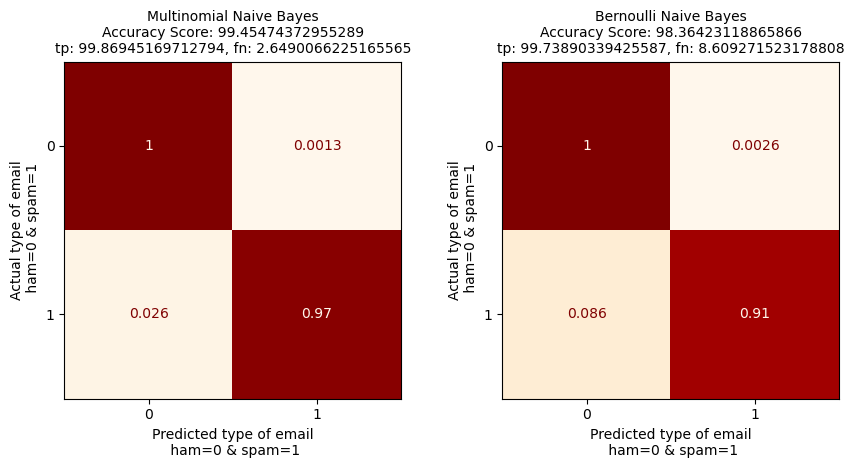

Multinomial naive Bayes classifier, Accuracy score: 99.45474372955289
Multinomial naive Bayes True Positive rate: 99.86945169712794
Multinomial naive Bayes False Negative rate: 2.6490066225165565
Multinomial naive Bayes tp_mnb, fp_mnb, fn_mnb, tn_mnb 765 1 4 147
Bernoulli naive Bayes classifier, Accuracy score: 98.36423118865866
Bernoulli naive Bayes True Positive rate: 99.73890339425587
Bernoulli naive Bayes False Negative rate: 8.609271523178808
Bernoulli naive Bayes tp_bnb, fp_bnb, fn_bnb, tn_bnb 764 2 13 138


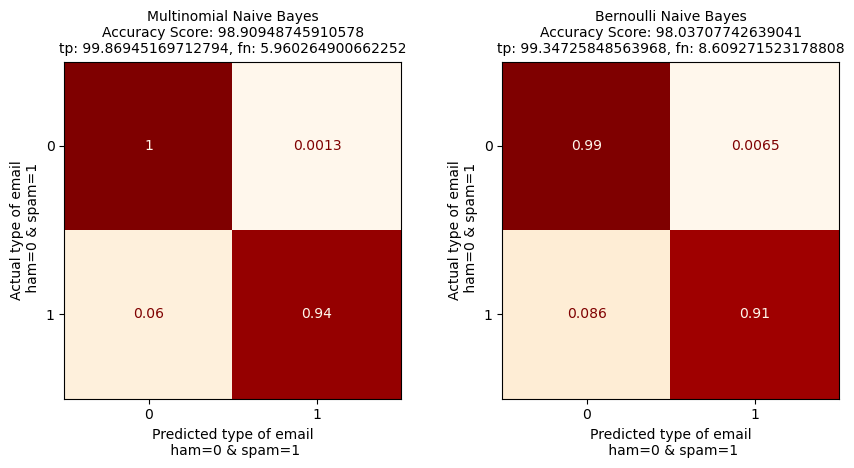

Multinomial naive Bayes classifier, Accuracy score: 98.90948745910578
Multinomial naive Bayes True Positive rate: 99.86945169712794
Multinomial naive Bayes False Negative rate: 5.960264900662252
Multinomial naive Bayes tp_mnb, fp_mnb, fn_mnb, tn_mnb 765 1 9 142
Bernoulli naive Bayes classifier, Accuracy score: 98.03707742639041
Bernoulli naive Bayes True Positive rate: 99.34725848563968
Bernoulli naive Bayes False Negative rate: 8.609271523178808
Bernoulli naive Bayes tp_bnb, fp_bnb, fn_bnb, tn_bnb 761 5 13 138


In [68]:
#Creating word count vectorizer with words that appear more than 90% of the time, words that appear in just one email, and common English words
vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, stop_words="english")
easyHam_spam_total_train(vectorizer=vectorizer)
easyHam_spam_train(vectorizer=vectorizer)

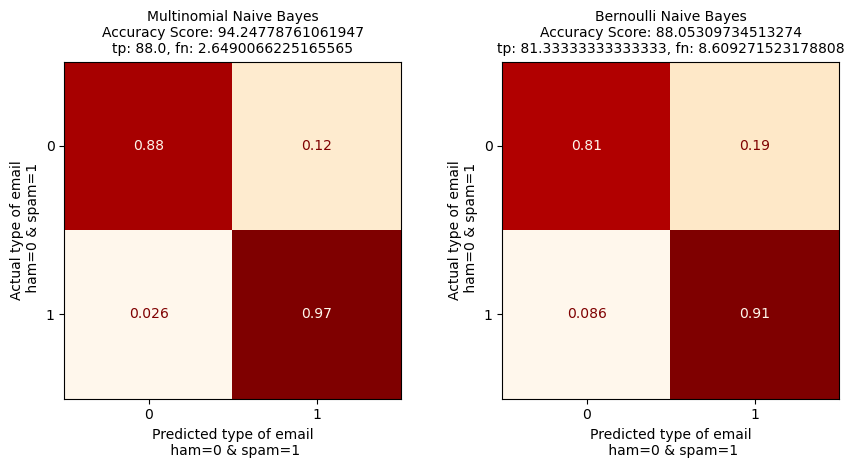

Multinomial naive Bayes classifier, Accuracy score: 94.24778761061947
Multinomial naive Bayes True Positive rate: 88.0
Multinomial naive Bayes False Negative rate: 2.6490066225165565
Multinomial naive Bayes tp_mnb, fp_mnb, fn_mnb, tn_mnb 66 9 4 147
Bernoulli naive Bayes classifier, Accuracy score: 88.05309734513274
Bernoulli naive Bayes True Positive rate: 81.33333333333333
Bernoulli naive Bayes False Negative rate: 8.609271523178808
Bernoulli naive Bayes tp_bnb, fp_bnb, fn_bnb, tn_bnb 61 14 13 138
(525,) (525,) (226,) (226,)


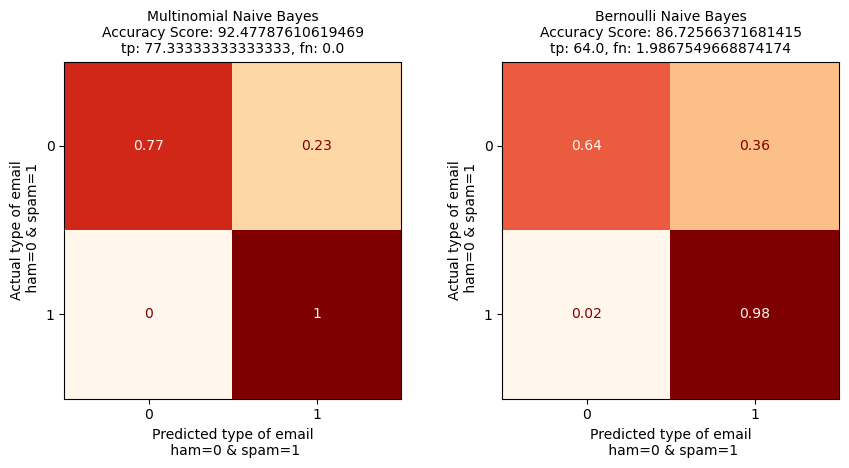

Multinomial naive Bayes classifier, Accuracy score: 92.47787610619469
Multinomial naive Bayes True Positive rate: 77.33333333333333
Multinomial naive Bayes False Negative rate: 0.0
Multinomial naive Bayes tp_mnb, fp_mnb, fn_mnb, tn_mnb 58 17 0 151
Bernoulli naive Bayes classifier, Accuracy score: 86.72566371681415
Bernoulli naive Bayes True Positive rate: 64.0
Bernoulli naive Bayes False Negative rate: 1.9867549668874174
Bernoulli naive Bayes tp_bnb, fp_bnb, fn_bnb, tn_bnb 48 27 3 148


In [69]:
#Creating word count vectorizer with words that appear more than 90% of the time, words that appear in just one email, and common English words
vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, stop_words="english")
hardHam_spam_total_train(vectorizer=vectorizer)
hardHam_spam_train(vectorizer=vectorizer)

###5. Eeking out further performance
Filter out the headers and footers of the emails before you run on them. The format may vary somewhat between emails, which can make this a bit tricky, so perfect filtering is not required. Run your program again and answer the following questions: 
-	Does the result improve from 3 and 4? 
- The split of the data set into a training set and a test set can lead to very skewed results. Why is this, and do you have suggestions on remedies? 
- What do you expect would happen if your training set were mostly spam messages while your test set were mostly ham messages? 

Re-estimate your classifier using `fit_prior` parameter set to `false`, and answer the following questions:
- What does this parameter mean?
- How does this alter the predictions? Discuss why or why not.